# Modelo Kmeans

## por Elias Preza

El modelo pretende recomendar una agrupación de los mejores grupos de producto de exportación que presentan la mayor relación valor/volumen en Kg, es decir, los productos que podrian generar mayor valor agregado y resultado de ganancias a las empresas que pretenden exportar a España. El modelo solo representa un pequeño ensayo que requiere ser pulido y afinado para poder pronosticar mejor la recomendación de que grupo de productos es potencialmente mejor exportar. En el ensayo se determinaron 3 kluster para la agrupación según lo determino el análisis, luego se procedió a realizar un EDA a la base con los clusters ya incorporados a cada registro.

In [69]:
#--Librerias
import numpy as np
import pandas as pd
import datatable as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [23]:
#--Llamar base
base=pd.read_csv("Bases/BaseModel.csv")

In [24]:
#--Ver estructura de la base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PAIS      544 non-null    object 
 1   Cod       544 non-null    int64  
 2   CodDesc   544 non-null    object 
 3   I_2017    544 non-null    float64
 4   I_2018    544 non-null    float64
 5   I_2019    544 non-null    float64
 6   I_2020    544 non-null    float64
 7   I_2021    544 non-null    float64
 8   II_2017   544 non-null    float64
 9   II_2018   544 non-null    float64
 10  II_2019   544 non-null    float64
 11  II_2020   544 non-null    float64
 12  II_2021   544 non-null    float64
 13  III_2017  544 non-null    float64
 14  III_2018  544 non-null    float64
 15  III_2019  544 non-null    float64
 16  III_2020  544 non-null    float64
 17  III_2021  544 non-null    float64
 18  Promedio  544 non-null    float64
dtypes: float64(16), int64(1), object(2)
memory usage: 80.9+ KB


In [25]:
#--ver base de datos
base.head()

PAIS        Cod                                            CodDesc  \
0  Espana  106190000                                      - - Los demás   
1  Espana  106200000  - Reptiles (incluidas las serpientes y tortuga...   
2  Espana  201100000                      - En canales o medias canales   
3  Espana  201200000          - Los demás cortes (trozos) sin deshuesar   
4  Espana  202200000          - Los demás cortes (trozos) sin deshuesar   

   I_2017    I_2018  I_2019   I_2020   I_2021  II_2017  II_2018  II_2019  \
0     0.0    300.00     0.0      0.0      0.0      0.0     30.0      0.0   
1  7250.0  21258.00  9438.0  12297.5  14910.0    181.0    366.0    254.0   
2     0.0     24.00     0.0      0.0      0.0      0.0      5.0      0.0   
3     0.0     94.82     0.0      0.0      0.0      0.0     22.0      0.0   
4     0.0    265.87     0.0      0.0      0.0      0.0     55.0      0.0   

   II_2020  II_2021  III_2017  III_2018  III_2019  III_2020  III_2021  \
0      0.0      0.0      0.00     10.00      0.00      0.00      0.00   
1    242.0    277.0     40.06     58.08     37.16     50.82     53.83   
2      0.0      0.0      0.00      4.80      0.00      0.00      0.00   
3      0.0      0.0      0.00      4.31      0.00      0.00      0.00   
4      0.0      0.0      0.00      4.83      0.00      0.00      0.00   

   Promedio  
0      2.00  
1     47.99  
2      0.96  
3      0.86  
4      0.97

In [53]:
#--Se crea un subset eliminando las variables
#baseModel=base.drop(['PAIS','Cod','CodDesc',''],axis=1)
#--Se crea el subset usando la libreria datatable
baseModel= dt.fread("Bases/BaseModel.csv")


In [54]:
baseModel=baseModel[:,13:19]

In [55]:
baseModel.head()

<Frame#7f2041f32e40 10x6>

In [58]:
#--Se exploran los principales indicadores de la base
baseModel=baseModel.to_pandas()

In [59]:
baseModel.describe()

III_2017     III_2018     III_2019    III_2020    III_2021  \
count   544.000000   544.000000   544.000000  544.000000  544.000000   
mean     34.842849    55.416029    60.762868   26.592059    7.176379   
std     153.067655   273.249186   266.911339   65.148136   43.869099   
min       0.000000     0.000000     0.000000    0.000000    0.000000   
25%       0.000000     0.000000     0.000000    0.000000    0.000000   
50%       0.000000     0.275000     0.000000    0.000000    0.000000   
75%      15.205000     5.757500     6.715000    2.402500    0.000000   
max    3167.030000  4525.560000  4921.560000  485.440000  577.860000   

          Promedio  
count   544.000000  
mean     36.958070  
std     112.896901  
min       0.000000  
25%       0.620000  
50%       2.125000  
75%      35.812500  
max    1755.730000

In [60]:
#--Escalara o normalizar la base de datos
base_norm=((baseModel-baseModel.mean())/baseModel.std())

In [61]:
#--Se observa la base
base_norm.head()

III_2017  III_2018  III_2019  III_2020  III_2021  Promedio
0 -0.227630 -0.166207 -0.227652 -0.408178 -0.163586 -0.309646
1  0.034084  0.009749 -0.088430  0.371890  1.063473  0.097717
2 -0.227630 -0.185238 -0.227652 -0.408178 -0.163586 -0.318858
3 -0.227630 -0.187031 -0.227652 -0.408178 -0.163586 -0.319744
4 -0.227630 -0.185128 -0.227652 -0.408178 -0.163586 -0.318769

In [62]:
#--Se observan patrones
base_norm.describe()

III_2017      III_2018      III_2019      III_2020      III_2021  \
count  5.440000e+02  5.440000e+02  5.440000e+02  5.440000e+02  5.440000e+02   
mean  -1.433188e-16 -3.030664e-16  3.340873e-16  6.207249e-16  1.328849e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.276304e-01 -2.028040e-01 -2.276519e-01 -4.081784e-01 -1.635862e-01   
25%   -2.276304e-01 -2.028040e-01 -2.276519e-01 -4.081784e-01 -1.635862e-01   
50%   -2.276304e-01 -2.017976e-01 -2.276519e-01 -4.081784e-01 -1.635862e-01   
75%   -1.282952e-01 -1.817335e-01 -2.024937e-01 -3.713009e-01 -1.635862e-01   
max    2.046276e+01  1.635922e+01  1.821128e+01  7.043148e+00  1.300878e+01   

           Promedio  
count  5.440000e+02  
mean   5.838875e-16  
std    1.000000e+00  
min   -3.273612e-01  
25%   -3.218695e-01  
50%   -3.085388e-01  
75%   -1.014704e-02  
max    1.522426e+01

In [63]:
base_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   III_2017  544 non-null    float64
 1   III_2018  544 non-null    float64
 2   III_2019  544 non-null    float64
 3   III_2020  544 non-null    float64
 4   III_2021  544 non-null    float64
 5   Promedio  544 non-null    float64
dtypes: float64(6)
memory usage: 25.6 KB


In [65]:
#--Busqueda de la cantidad optima del kluster
wcss =[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(base_norm) #Se aplica k-means a la base de datos
    wcss.append(kmeans.inertia_)

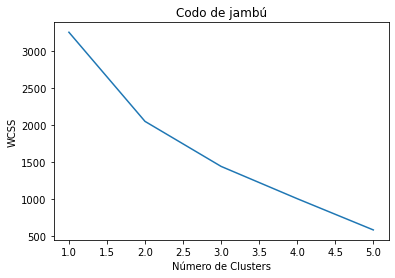

In [66]:
plt.plot(range(1,6),wcss)
plt.title("Codo de jambú")
plt.xlabel("Número de Clusters")
plt.ylabel('WCSS')# WCSS es un indicador de qué tan similar son los individuos dentro de los clusters
plt.show()

In [67]:
clustering=KMeans(n_clusters=3,max_iter=300)#-crea el modelo
clustering.fit(base_norm)#--aplica el modelo a la base de datos

KMeans(n_clusters=3)

In [68]:
base['KMeans_Clusters']=clustering.labels_ #--los resultados del clustering se guardan en labels_ dentro del modelo
base.head()

PAIS        Cod                                            CodDesc  \
0  Espana  106190000                                      - - Los demás   
1  Espana  106200000  - Reptiles (incluidas las serpientes y tortuga...   
2  Espana  201100000                      - En canales o medias canales   
3  Espana  201200000          - Los demás cortes (trozos) sin deshuesar   
4  Espana  202200000          - Los demás cortes (trozos) sin deshuesar   

   I_2017    I_2018  I_2019   I_2020   I_2021  II_2017  II_2018  II_2019  \
0     0.0    300.00     0.0      0.0      0.0      0.0     30.0      0.0   
1  7250.0  21258.00  9438.0  12297.5  14910.0    181.0    366.0    254.0   
2     0.0     24.00     0.0      0.0      0.0      0.0      5.0      0.0   
3     0.0     94.82     0.0      0.0      0.0      0.0     22.0      0.0   
4     0.0    265.87     0.0      0.0      0.0      0.0     55.0      0.0   

   II_2020  II_2021  III_2017  III_2018  III_2019  III_2020  III_2021  \
0      0.0      0.0      0.00     10.00      0.00      0.00      0.00   
1    242.0    277.0     40.06     58.08     37.16     50.82     53.83   
2      0.0      0.0      0.00      4.80      0.00      0.00      0.00   
3      0.0      0.0      0.00      4.31      0.00      0.00      0.00   
4      0.0      0.0      0.00      4.83      0.00      0.00      0.00   

   Promedio  KMeans_Clusters  
0      2.00                1  
1     47.99                1  
2      0.96                1  
3      0.86                1  
4      0.97                1

In [75]:
freq = base['KMeans_Clusters'].value_counts()
print(freq)

1    458
0     84
2      2
Name: KMeans_Clusters, dtype: int64


In [74]:
#--Aplicando PCA
pca=PCA(n_components=2)
pca_base=pca.fit_transform(base_norm)
pca_base_df=pd.DataFrame(data=pca_base,columns=['Componente_1','Componente_2'])
pca_nombres_base=pd.concat([pca_base_df, base[['KMeans_Clusters']]], axis=1)

pca_nombres_base

Componente_1  Componente_2  KMeans_Clusters
0       -0.510090     -0.324015                1
1        0.105389      0.229898                1
2       -0.525922     -0.320363                1
3       -0.527424     -0.320020                1
4       -0.525810     -0.320382                1
..            ...           ...              ...
539     -0.536489     -0.306543                1
540      0.391304     -0.626655                0
541     -0.232006     -0.395054                1
542     -0.516804     -0.265553                1
543     -0.502367     -0.304707                1

[544 rows x 3 columns]

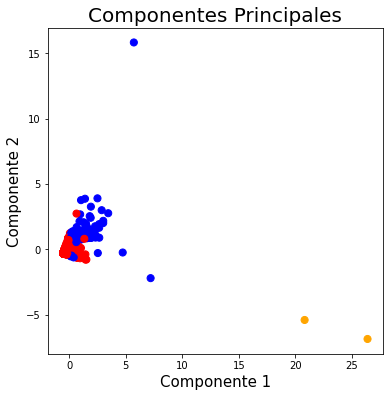

In [77]:
fig=plt.figure(figsize=(6,6))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme= np.array(["blue","red","orange"])
ax.scatter(x=pca_nombres_base.Componente_1,y=pca_nombres_base.Componente_2,
          c=color_theme[pca_nombres_base.KMeans_Clusters],s=50)
plt.show()

In [78]:
base.to_csv("Bases/baseClusters.csv")